# Simule el primer sistema cuántico descrito en la sección 4.1.

#### 1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [1]:
import numpy as np

def probabiidad(V,X1):
    return np.abs(V[X1])**2 / np.linalg.norm(V)**2

vector2 = [-3-1j,-2j,1j,2]
print(probabiidad(vector2,2))

0.05263157894736841


#### 2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [8]:
import numpy as np

def probability_Transition(vector1,vector2):
    return np.abs(np.vdot(vector2, vector1))**2

vector1 = [-3-1j,-2j,1j,2]
vector2 = [1-2j, -3j, 4,-5+2j]

print(probability_Transition(vector1,vector2))


74.0


# Complete los retos de programación del capítulo 4.

#### 1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [ ]:
import numpy as np

def probability_Transition(vector1,vector2):
    return np.abs(np.vdot(vector2, vector1))**2

vector1 = [-3-1j,-2j,1j,2]
vector2 = [1-2j, -3j, 4,-5+2j]

print(probability_Transition(vector1,vector2))

#### 2.Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [11]:
def is_hermitian(matrix):
    return np.allclose(matrix, matrix.conj().T)

def observable(matrix, vector, O):
    hermitian_matrix = np.array(matrix)

    if is_hermitian(hermitian_matrix):
        valor_esperado = np.vdot(vector, O @ vector)
        return is_hermitian, hermitian_matrix, valor_esperado, varianza(hermitian_matrix, vector)
    else:
        return is_hermitian, hermitian_matrix

def media(vector,observable):
    multiplication = np.dot(observable, vector)
    return np.vdot(vector, multiplication)

def varianza(O, vector):
    O2 = O @ O
    valor_es1 = np.vdot(vector, O @ vector)
    valor_es2 = np.vdot(vector, O2 @ vector)
    return valor_es2 - valor_es1**2



#### 3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [ ]:
import numpy as np

def is_hermitian(matrix):
    return np.allclose(matrix, matrix.conj().T)

def eigen_probabilities(ket, matrix):
    if not is_hermitian(matrix):
        raise ValueError("La matriz no es hermitiana.")
    
    eigenvalues, eigenvectors = np.linalg.eigh(matrix) 
    probabilities = []
    
    for i in range(len(eigenvalues)):
        eigenvector = eigenvectors[:,i] 
        prob = np.abs(np.vdot(eigenvector, ket))**2 
        probabilities.append((eigenvalues[i], prob))
    
    return probabilities

#### 4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [ ]:
def is_hermitian(matriz_operador):
    return np.allclose(matriz_operador, matriz_operador.conj().T)


def final_state(estado_inicial_sistema, operadores_evolucion):
    estado_sistema_actual = estado_inicial_sistema.astype(np.complex128)
    for operador in operadores_evolucion:
        estado_sistema_actual = np.dot(operador, estado_sistema_actual)
        estado_sistema_actual /= np.linalg.norm(estado_sistema_actual)
    return estado_sistema_actual



# Realice los siguientes problemas e incluyalos como ejemplos

## PROBLEMA 4.3.1

In [ ]:
import numpy as np

estado_inicializado = np.array([1, 0])

operador_spin_x = np.array([[0, 1], [1, 0]])

estado_finalizado = np.dot(operador_spin_x, estado_inicializado)

probabilidad_arriba = abs(estado_finalizado[0])**2
probabilidad_abajo = abs(estado_finalizado[1])**2

print("Probabilidad de encontrar el spin hacia arriba:", probabilidad_arriba)
print("Probabilidad de encontrar el spin hacia abajo:", probabilidad_abajo)


## PROBLEMA 4.3.2

Probabilidad de encontrar el spin hacia arriba: 0
Probabilidad de encontrar el spin hacia abajo: 1


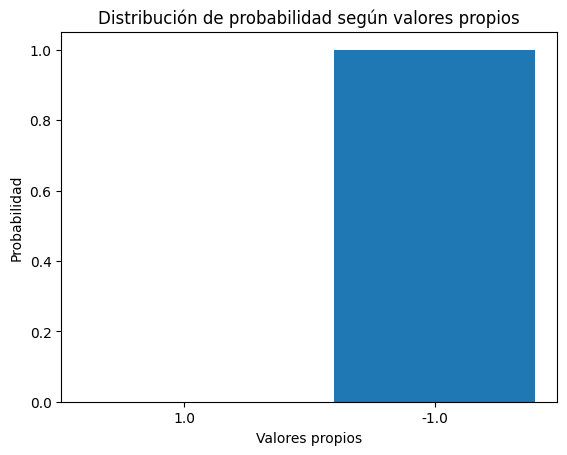

In [12]:
import numpy as np
import matplotlib.pyplot as plt

estado_inicializado = np.array([1, 0])

operador_spin_y = np.array([[0, 1], [1, 0]])

estado_resultante = np.dot(operador_spin_y, estado_inicializado)

probabilidad_arriba = abs(estado_resultante[0])**2
probabilidad_abajo = abs(estado_resultante[1])**2

print("Probabilidad de encontrar el spin hacia arriba:", probabilidad_arriba)
print("Probabilidad de encontrar el spin hacia abajo:", probabilidad_abajo)

propios_valores, _ = np.linalg.eig(operador_spin_y)

plt.bar(np.arange(len(propios_valores)), abs(estado_resultante)**2)
plt.xticks(np.arange(len(propios_valores)), propios_valores)
plt.xlabel('Valores propios')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad según valores propios')
plt.show()


## PROBLEMA 4.4.1

In [13]:
import numpy as np

matriz_A = np.array([[0, 1], [1, 0]])
matriz_B = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])

unitaria_A = "es" if np.allclose(np.dot(matriz_A.conj().T, matriz_A), np.eye(2)) else "no es"

unitaria_B = "es" if np.allclose(np.dot(matriz_B.conj().T, matriz_B), np.eye(2)) else "no es"

producto_AB = np.dot(matriz_A, matriz_B)

producto_unitario = "es" if np.allclose(np.dot(producto_AB.conj().T, producto_AB), np.eye(2)) else "no es"

# Resultados
print("Matriz A", unitaria_A, "unitaria")
print("Matriz B", unitaria_B, "unitaria")
print("El producto de A y B", producto_unitario, "unitario")


Matriz A es unitaria
Matriz B es unitaria
El producto de A y B es unitario


## PROBLEMA 4.4.2

In [14]:
import numpy as np

mapa_cuantico = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])

estado_base = np.array([1, 0, 0, 0])
estado_modificado = np.linalg.matrix_power(mapa_cuantico, 3) @ estado_base
probabilidad_posicion_3 = np.abs(estado_modificado[2])**2

print("El estado del sistema después de 3 iteraciones es:", estado_modificado)
print("Probabilidad de encontrar la partícula en la posición 3:", probabilidad_posicion_3)


El estado del sistema después de 3 iteraciones es: [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de encontrar la partícula en la posición 3: 0.0


# EJERCICIOS A DISCUTIR

## PROBLEMA 4.5.2

#### Dado que los estados son resultado del producto tensorial de estados anteriores, se podria escribir como la multiplicatoria tensorial desde el primer estado hasta el estado n. 
## $$ |\Psi\rangle = |\Psi_1\rangle \otimes |\Psi_2\rangle \otimes \cdots \otimes |\Psi_n\rangle $$


## PROBLEMA 4.5.3


##### Sabiendo que ∣ϕ⟩
$|\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle$

##### Expresamos como producto tensorial de dos estados.
$ |\alpha\rangle \otimes |\beta\rangle = (a|x_0\rangle + b|x_1\rangle) \otimes (c|y_0\rangle + d|y_1\rangle) $
##### Expandemos el producto tensorial
$ |\alpha\rangle \otimes |\beta\rangle = ac|x_0\rangle \otimes |y_0\rangle + ad|x_0\rangle \otimes |y_1\rangle + bc|x_1\rangle \otimes |y_0\rangle + bd|x_1\rangle \otimes |y_1\rangle $

##### El estado ∣ϕ⟩  no es separable, dadno que no hay coefientes a, b, c y d los cuales hagan que las dos expresiones sean iguales.